# Momentum 

Standard gradient descent. 

epoch 20, x1 -0.943467, x2 -0.000073


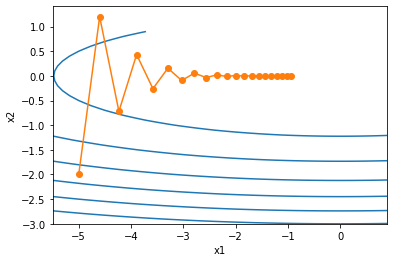

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

def train_2d(trainer):  
    x1, x2, s1, s2 = -5, -2, 0, 0 
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

def show_trace_2d(f, results):  
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

show_trace_2d(f_2d, train_2d(gd_2d))

## Momentum

Stochastic gradient descent with momentum remembers the update $\Delta w$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update.

epoch 20, x1 -0.062843, x2 0.001202


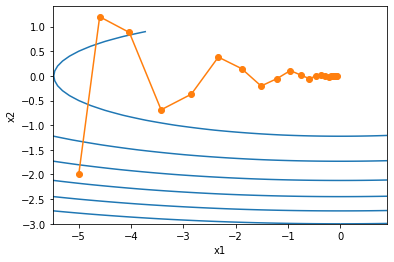

In [2]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

GD with a large learning rate

epoch 20, x1 -0.387814, x2 -1673.365109


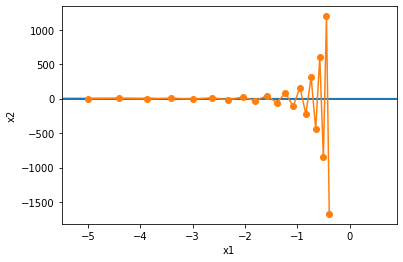

In [3]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

Same learning rate for momentum. 

epoch 20, x1 0.007188, x2 0.002553


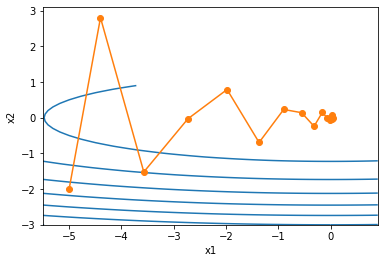

In [4]:
show_trace_2d(f_2d, train_2d(momentum_2d))

# Adagrad

epoch 20, x1 -2.382563, x2 -0.158591


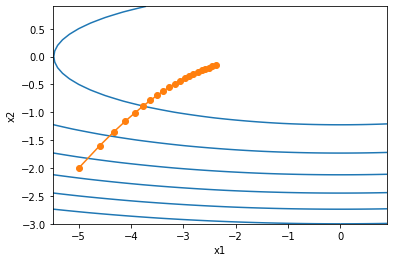

In [5]:
def adagrad_2d(x1, x2, s1, s2):
    # The first two terms are the independent variable gradients
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

Use a much larger learning rate.

epoch 20, x1 -0.002295, x2 -0.000000


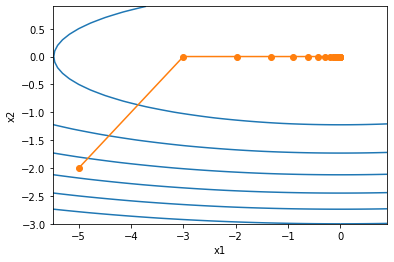

In [6]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

# RMSProp

epoch 20, x1 -0.010599, x2 0.000000


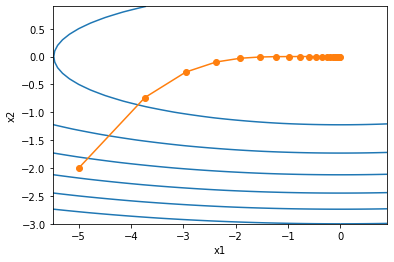

In [7]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2


eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))